# El problema de la separación

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [3]:
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

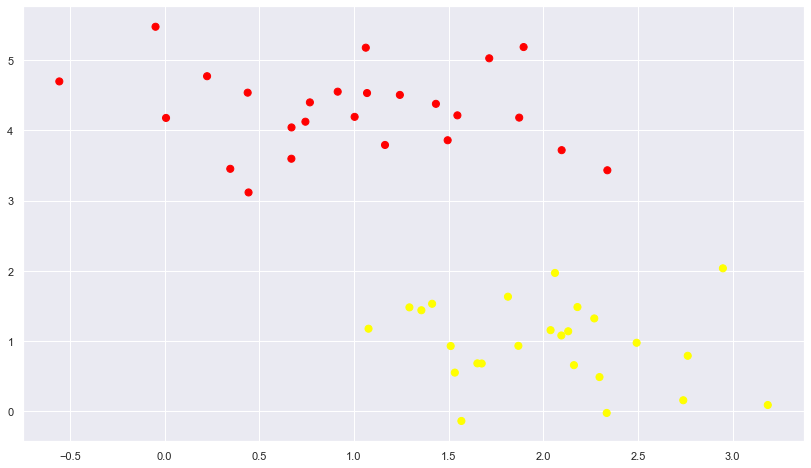

In [4]:
plt.figure(figsize=(14,8))
plt.scatter(X[:,0],X[:,1], c=Y, s=50, cmap="autumn")

(-1, 3.5)

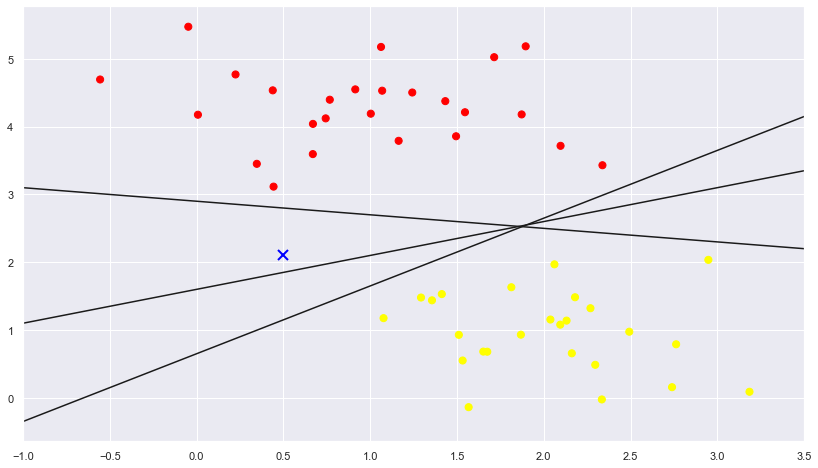

In [5]:
xx = np.linspace(-1,3.5)
plt.figure(figsize=(14,8))
plt.scatter(X[:,0],X[:,1], c=Y, s=50, cmap="autumn")
plt.plot([0.5],[2.1], 'x',color="blue",markeredgewidth=2,markersize=10)
for a, b in [(1,0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
plt.xlim(-1,3.5)

## Maximizar el margen de clasificación

(-1, 3.5)

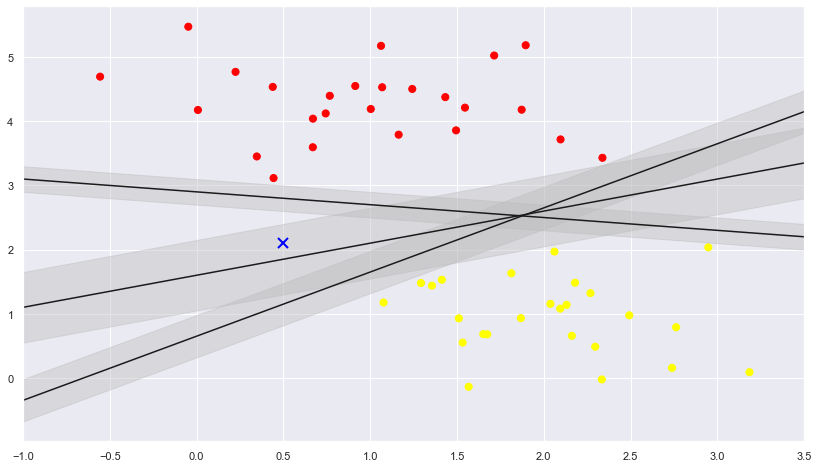

In [6]:
xx = np.linspace(-1,3.5)
plt.figure(figsize=(14,8))
plt.scatter(X[:,0],X[:,1], c=Y, s=50, cmap="autumn")
plt.plot([0.5],[2.1], 'x',color="blue",markeredgewidth=2,markersize=10)
for a, b, d in [(1,0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    plt.fill_between(xx, yy - d, yy + d, edgecolor=None, color="#BBBBBB", alpha=0.4)
plt.xlim(-1,3.5)

# Los soportes de SVM

## Creacion del modelo SVM

In [8]:
from sklearn.svm import SVC

In [10]:
model = SVC(kernel="linear", C=1E10)
model.fit(X,Y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
def plt_svc(model,ax=None, plot_support=True):
    """"Plot para la fx de decision para una clasificacion en 2d con SVC"""
    if(ax==None):
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ## generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    
    Y, X = np.meshgrid(yy, xx)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ## representamos las fronteras y los margenes de SVC
    ax.contour(X, Y, P, colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--","-","--"])
    print(model.support_vectors_)
    if(plot_support):
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                  s=300, linewidth=1, facecolors="black")
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


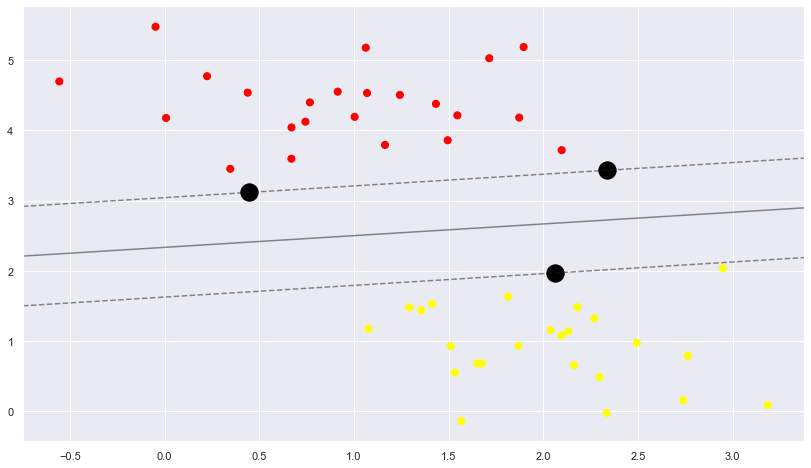

In [26]:
plt.figure(figsize=(14,8))
plt.scatter(X[:,0],X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(model, plot_support=True)

In [32]:
def plt_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    X = X[:N]
    Y = Y[:N]
    model= SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, cmap="autumn")
    
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plt_svc(model, ax)


[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


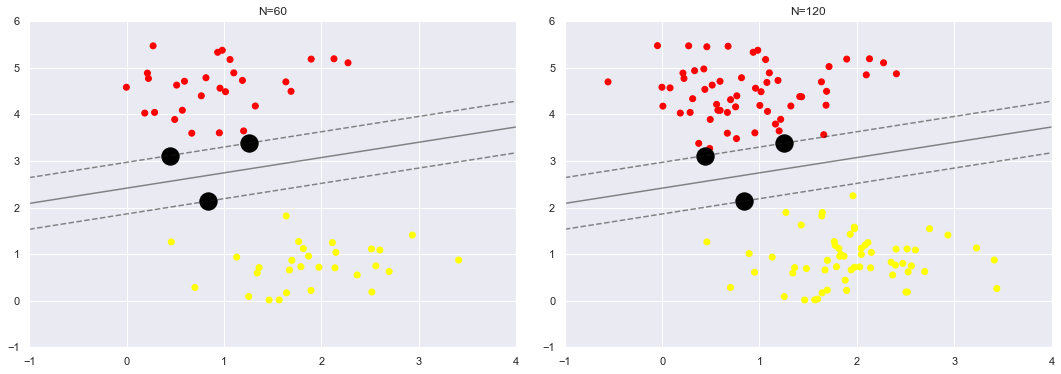

In [33]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for ax_i, N in zip(ax, [60, 120]):
    plt_svm(N, ax_i)
    ax_i.set_title("N={0}".format(N))

In [34]:
from ipywidgets import interact, fixed

In [39]:
interact(plt_svm, N=[10, 50, 100, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 50, 100, 200), value=10), Output()), _dom_classes…

<function __main__.plt_svm(N=10, ax=None)>